<a href="https://colab.research.google.com/github/jevylux/pytorchtraining/blob/main/pytorchworkflowresume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import pytorch, numpy and matplotlib
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# check torch version
print(torch.__version__)

# create device agnostic code ( if acces to gpu, tje code wil use it)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")



2.1.0+cu118
Using device : cuda


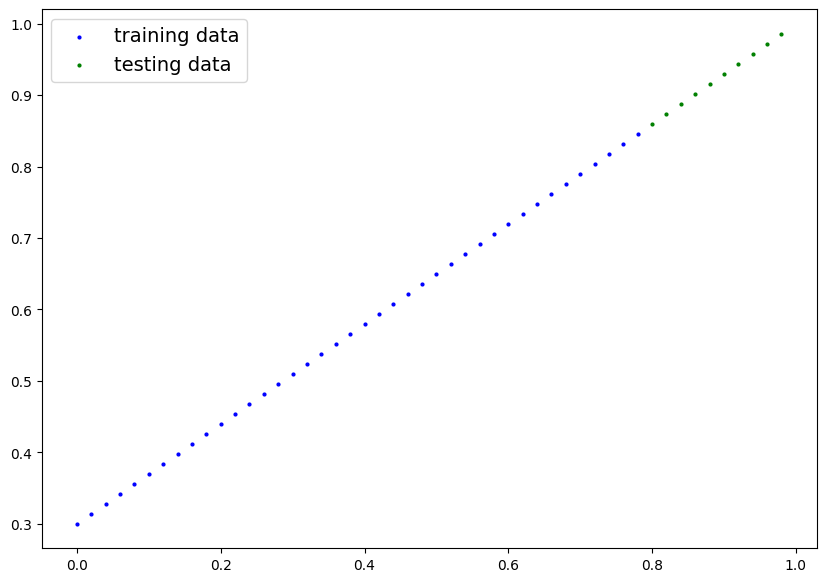

In [19]:
# we define a plot function . remember :  data explorer's moto : "visualize, visualize"
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
  if predictions is not None:
    # plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14})

plot_predictions();

In [20]:
# create Data using the linear regression formuala of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

#Create X and y ( features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(X[:10], y[:10])

# spilt data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
40 40 10 10


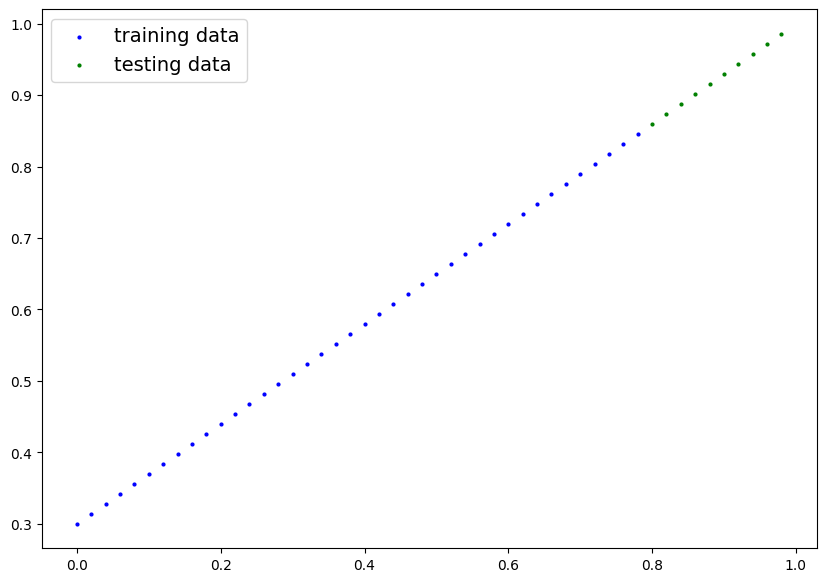

In [21]:
# plot the data  if you don't have the plot_predictions() function loaded ,this will error
plot_predictions(X_train, y_train, X_test, y_test)

In [22]:
# now we build a linear pytorch model by subclassing nn.Module ( we do not create parameters this time, but layers)
class LinearRregressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters / also called linear transform, probing layer, fulley connected layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
# set the manual seed
torch.manual_seed(42)
model_1 = LinearRregressionModelV2()
print(model_1, model_1.state_dict())

LinearRregressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
) OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [23]:
# set the model to use the target device
next(model_1.parameters()).device


device(type='cpu')

In [24]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [29]:
# training
# loss function
loss_fn = nn.L1Loss()
# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)
# training loop
torch.manual_seed(42)
epochs = 200

# put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  # forward pass
  y_pred = model_1(X_train)
  # loss
  loss = loss_fn(y_pred, y_train)
  # optimizer zero_grad
  optimizer.zero_grad()
  # backpropagation
  loss.backward()
  # optimizer step
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  # print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

# testing loop


Epoch: 0 | Loss: 0.010256479494273663 | Test loss: 0.012454724870622158
Epoch: 10 | Loss: 0.0006695442134514451 | Test loss: 0.0014927327865734696
Epoch: 20 | Loss: 0.0003230251313652843 | Test loss: 0.0006653607124462724
Epoch: 30 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 40 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 50 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 60 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 70 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 80 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 90 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 100 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 110 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 120 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 130 | Lo

In [30]:
model_1.state_dict()



OrderedDict([('linear_layer.weight', tensor([[0.6992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2998], device='cuda:0'))])

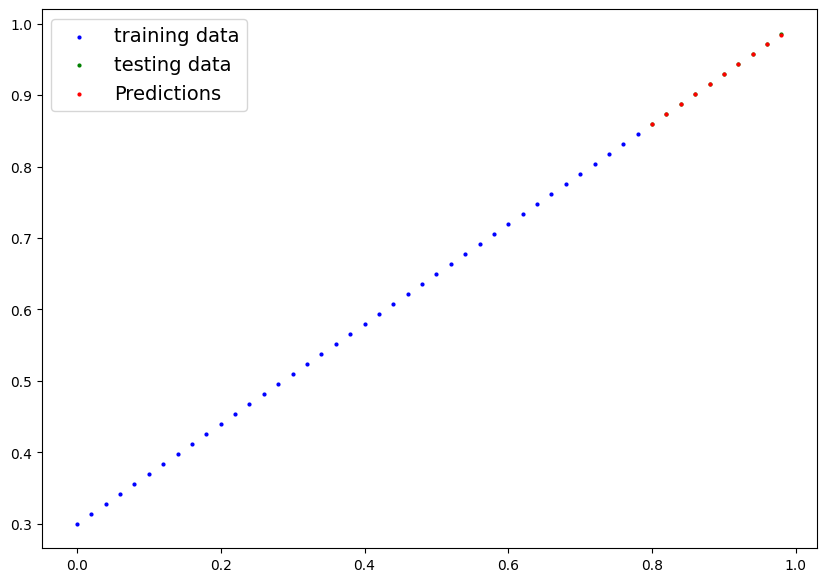

In [38]:
# turn the model into evaluation mode
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

# check out our nodel predictions visually

plot_predictions(predictions=y_preds.cpu())

In [41]:
# saving and lading a trained model
from pathlib import Path
# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEl_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEl_NAME
print(f" Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


 Saving model to models/01_pytorch_workflow_model_1.pth


In [47]:
# load saved models
# create a new instance of the model
loaded_model_1 = LinearRregressionModelV2()
# load the savled model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
# put the loaded model to device
loaded_model_1.to(device)
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [49]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')